In [1]:
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('phishingdetectiondataset3.csv')
df.head()

,Unnamed: 0,url,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_underscore,nb_percent,...,https_token,domain_age,dns_record,tiny_url,redirection,url_depth,protocol,protocol_count,special_char,status
0,0,http://www.mobilemoneyavalanche.com/update/www...,5,0,0,1,0,0,0,0,...,0,0,0,0,0,4,1,1,1,phishing
1,1,http://www.mayfairfoods.in/wp-content/themes/t...,3,4,0,0,0,0,0,0,...,0,0,1,0,0,4,1,1,0,phishing
2,2,http://www.kst365.com/js/?dest&amp;https://sec...,5,0,0,2,2,0,0,0,...,0,5238,1,0,1,1,1,2,10,phishing
3,3,http://mail.inifapcirpac.gob.mx/Desarrollo/Sig...,4,1,0,0,0,0,0,0,...,0,0,1,0,0,2,1,1,0,phishing
4,4,https://medium.com/@brianforde/hi-matt-that-s-...,1,18,1,1,0,0,0,0,...,1,0,1,0,0,2,0,1,2,legitimate


In [4]:
# Dropping all the columns which are not required for modelling. 
df.drop(["Unnamed: 0", 'nb_or','nb_dollar','nb_space','tiny_url'],axis = 1, inplace = True)

In [5]:
# Dependent and Independent Features: 
dependent_features = df.iloc[:,-1]
independent_features = df.iloc[:,1:-1]
print("Dependent feature(s):",df.columns[-1])
print("\nIndependent Feature(s):",df.columns[1:-1])

Dependent feature(s): status

Independent Feature(s): Index(['nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_underscore',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolon', 'nb_www', 'nb_com', 'nb_tilde', 'url_length',
       'length_hostname', 'ratio_digits_url', 'ratio_digits_host',
       'web_traffic', 'ip_present', 'prefix_suffix', 'https_token',
       'domain_age', 'dns_record', 'redirection', 'url_depth', 'protocol',
       'protocol_count', 'special_char'],
      dtype='object')


In [6]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(independent_features,dependent_features, test_size = 0.2, random_state = 0)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [7]:
# Selecting the best training size.
for i in [0.2,0.33,0.5]:
    test_size = i
    x_train,x_test,y_train,y_test = train_test_split(independent_features,dependent_features, test_size = test_size, random_state = 0)
    rf.fit(x_train,y_train)
    print(rf.score(x_test,y_test))

0.9968394437420987
0.9950191570881226
0.9946889226100152


In [8]:
x_train,x_test,y_train,y_test = train_test_split(independent_features,dependent_features, test_size = 0.2, random_state = 0)

In [9]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
models = [DecisionTreeClassifier(),LogisticRegression(),SVC(),GradientBoostingClassifier(),AdaBoostClassifier(), RandomForestClassifier()]
for model in models:
    model.fit(x_train,y_train)
    print(str(model) , ' -  ->test_accuracy: ' ,model.score(x_test,y_test))

DecisionTreeClassifier()  -  ->test_accuracy:  0.9943109987357776
LogisticRegression()  -  ->test_accuracy:  0.8767383059418458
SVC()  -  ->test_accuracy:  0.5505689001264222
GradientBoostingClassifier()  -  ->test_accuracy:  0.9962073324905183
AdaBoostClassifier()  -  ->test_accuracy:  0.995575221238938
RandomForestClassifier()  -  ->test_accuracy:  0.9962073324905183


In [29]:
# Optimizing the algorithm using Grid Search CV 
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators":[100,200,300,400,500],
    "criterion":['gini','entropy'],
    "max_depth":[20,25,30,35,40],
}
model = GridSearchCV(RandomForestClassifier(), param_grid = param_grid)
model.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 30, 35, 40],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [32]:
print(model.best_params_)

{'criterion': 'entropy', 'max_depth': 25, 'n_estimators': 300}


In [37]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.340187,0.009877,0.021548,0.008756,gini,20,100,"{'criterion': 'gini', 'max_depth': 20, 'n_esti...",0.992891,0.997628,0.996838,0.992885,0.996838,0.995416,0.002084,43
1,0.720441,0.089936,0.043231,0.008172,gini,20,200,"{'criterion': 'gini', 'max_depth': 20, 'n_esti...",0.991311,0.998419,0.998419,0.993676,0.996838,0.995733,0.002808,14
2,0.966076,0.025656,0.055635,0.003254,gini,20,300,"{'criterion': 'gini', 'max_depth': 20, 'n_esti...",0.992101,0.997628,0.997628,0.993676,0.996838,0.995574,0.002267,31
3,1.263848,0.011751,0.079457,0.006112,gini,20,400,"{'criterion': 'gini', 'max_depth': 20, 'n_esti...",0.992101,0.998419,0.997628,0.993676,0.996838,0.995732,0.002427,18
4,1.643402,0.120626,0.090179,0.005755,gini,20,500,"{'criterion': 'gini', 'max_depth': 20, 'n_esti...",0.992101,0.997628,0.997628,0.993676,0.996047,0.995416,0.002200,39
5,0.318377,0.012842,0.024794,0.011605,gini,25,100,"{'criterion': 'gini', 'max_depth': 25, 'n_esti...",0.992891,0.998419,0.996047,0.993676,0.996047,0.995416,0.001961,43
6,0.639290,0.006777,0.040379,0.004835,gini,25,200,"{'criterion': 'gini', 'max_depth': 25, 'n_esti...",0.992891,0.998419,0.997628,0.996047,0.996047,0.996207,0.001895,2
7,1.020108,0.121603,0.056125,0.006063,gini,25,300,"{'criterion': 'gini', 'max_depth': 25, 'n_esti...",0.992101,0.998419,0.997628,0.994466,0.996047,0.995732,0.002267,18
8,1.253756,0.010639,0.078831,0.007538,gini,25,400,"{'criterion': 'gini', 'max_depth': 25, 'n_esti...",0.991311,0.998419,0.996838,0.994466,0.997628,0.995733,0.002576,14
9,1.630267,0.067566,0.109998,0.023000,gini,25,500,"{'criterion': 'gini', 'max_depth': 25, 'n_esti...",0.992891,0.998419,0.997628,0.993676,0.996838,0.995890,0.002201,12


In [10]:
random_forest_model = RandomForestClassifier(n_estimators = 300, criterion= 'entropy',max_depth = 25)
random_forest_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=300)

In [72]:
with open('classifier_model.sav','wb') as f:
    pickle.dump(random_forest_model,f)

# Model Evaluation

In [11]:
y_true = y_test
y_pred = random_forest_model.predict(x_test)

# Confusion Matrix

col_0       legitimate  phishing
status                          
legitimate         796         3
phishing             1       782


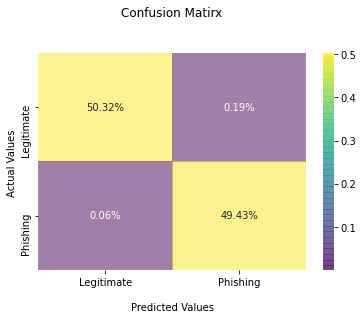

In [67]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true,y_pred)
cf_mat = pd.crosstab(y_true,y_pred)
print(cf_mat)
ax = sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.2%', cmap='viridis', alpha = 0.5)
ax.set_title('Confusion Matirx\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Legitimate','Phishing'])
ax.yaxis.set_ticklabels(['Legitimate','Phishing'])
plt.show()

# Other Evaluation Metrics

In [61]:
TP = 782
TN = 796
FP = 3
FN =1
accuracy = (TP + TN)/(TP + TN + FP + FN)
print("Accuracy: ",accuracy)
precision = TP / (TP + FP)
print("\nPrecision : ",precision)
recall = TP / (TP + FN) 
print("\nRecall : ", recall)
sensitivity= TP/(TP+FN)
print("\nSensitivity : ",sensitivity)

specificity = TN /(FP+TN)
print("\nSpecificity: ", specificity)

Accuracy:  0.9974715549936789

Precision :  0.9961783439490446

Recall :  0.9987228607918263

Sensitivity :  0.9987228607918263

Specificity:  0.9962453066332916


# Roc Curve

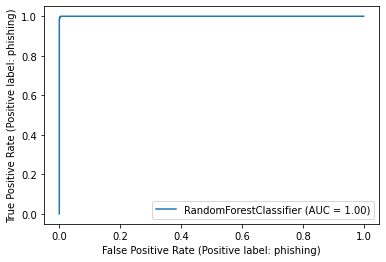

In [76]:
from sklearn.metrics import plot_roc_curve
roc_disp = plot_roc_curve(random_forest_model, x_test, y_test, ax=ax, alpha=0.8)
roc_disp.plot()
plt.show()